In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
               "@{host}:{port}/{database}")
engine = create_engine(cnxn_string.format(
    username="postgres", 
    pswd="1", 
    host="localhost", 
    port=5432,
    database="sqlda"))  

In [14]:
df = pd.read_sql_query('''
SELECT 
    DATE_TRUNC('month', date_added)
        AS month_date,
    COUNT(1) AS number_of_new_customers
FROM customers
WHERE EXTRACT(year FROM date_added) = 2018
GROUP BY 1
ORDER BY 1;
''', engine)

In [15]:
df

,month_date,number_of_new_customers
0,2018-01-01,430
1,2018-02-01,415
2,2018-03-01,450
3,2018-04-01,423
4,2018-05-01,454
5,2018-06-01,456
6,2018-07-01,478
7,2018-08-01,448
8,2018-09-01,440
9,2018-10-01,464


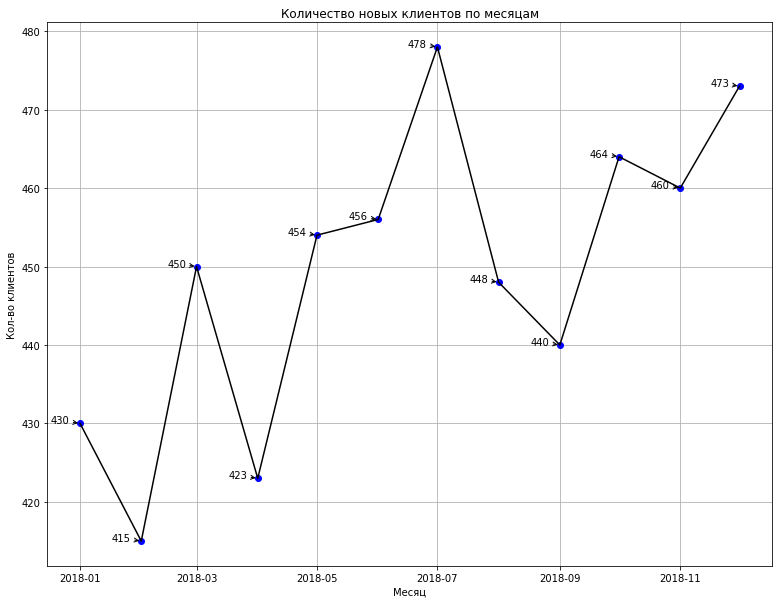

In [21]:
# Создаем линейный график

plt.figure(figsize = (13,10))
# Рисуется два графика:
# 1. Отображаются только точки: параметр 'bo'
# 2. Отображается линия: параметр 'k'
plt.plot(df['month_date'], df['number_of_new_customers'],'bo', df['month_date'], df['number_of_new_customers'], 'k')

# Проставление меток на графике
# https://linuxhint.com/labels-matplotlib/
for x,y in zip(df['month_date'],df['number_of_new_customers']):
    label = y
    plt.annotate(label,(x,y), 
                 textcoords="offset points", 
                 xytext=(-20,0), ha='center',
                 arrowprops=dict(arrowstyle="->", 
                 color='black'))

plt.title('Количество новых клиентов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.grid(True)

plt.show()